In [10]:
import numpy as np

from numpy import *
from numpy.random import *

import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit

from sklearn.metrics import mean_squared_error

### Задание 1.1.3

In [11]:
# Случайные данные

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([30, 50, 80, 160, 300, 580])

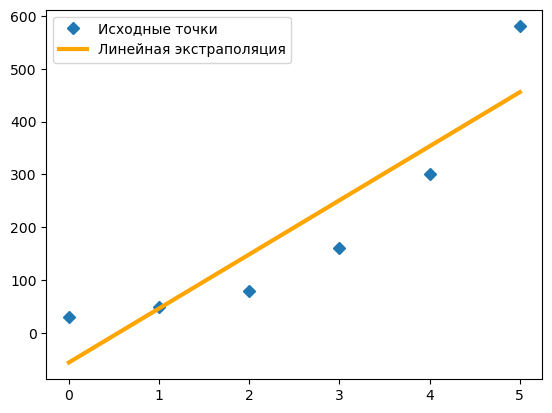

Коэф-ы полинома:  102.286 -55.714
Исходные y: 30 50 80 160 300 580
Полученные y:  -55.714 46.571 148.857 251.143 353.429 455.714
MSE:  6451.42857142857


In [12]:
# y = kx + b; y = ms

m = vstack((x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

plt.plot(x, y, "D", label='Исходные точки')
plt.plot(x, s[0] * x + s[1], 'orange',lw=3, label='Линейная экстраполяция')
plt.legend()
plt.show()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x + s[1]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x + s[1]))

Коэф-ы полинома:  31.071 -53.071 47.857
Исходные y: 30 50 80 160 300 580
Полученные y:  47.857 25.857 66.0 168.286 332.714 559.286
MSE:  444.2857142857142


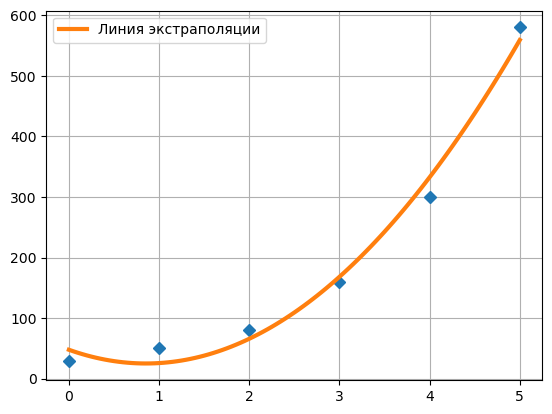

In [13]:
# y = ax^2 + bx + c; y = ms
from sklearn.metrics import mean_squared_error

m = vstack((x**2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [0, 5]
x_prec = linspace(0, 5, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = ax^2 + bx + d, подставляя из решения коэф-ы s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
#mean_squared_error(y, x*)
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**2 + s[1] * x + s[2]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x**2 + s[1] * x + s[2]))

Коэф-ы полинома:  6.296 -16.151 33.188 28.968
Исходные y: 30 50 80 160 300 580
Полученные y:  28.968 52.302 81.111 153.175 306.27 578.175
MSE:  16.137566137566047


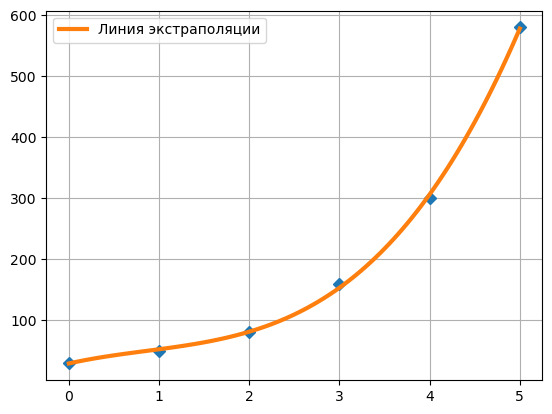

In [14]:
# y = ax^3 + bx^2 + cx + d; y = ms

m = vstack((x**3, x**2, x, np.ones(len(x)))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [0, 5]
x_prec = linspace(0, 5, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэф-ы s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()
print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**3 + s[1] * x**2 + s[2] * x + s[3]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x**3 + s[1] * x**2 + s[2] * x + s[3]))

### Задание 1.1.5

In [20]:
import pandas as pd
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

(30, 2)


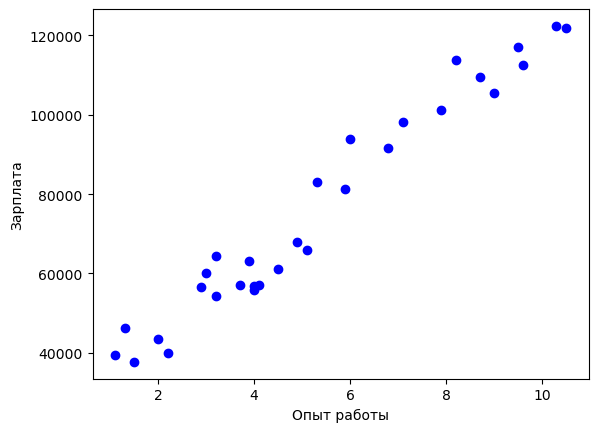

26780.09915062818
[9312.57512673]
     Actual      Predicted
0   37731.0   40748.961841
1  122391.0  122699.622956
2   57081.0   64961.657170
3   63218.0   63099.142145
4  116969.0  115249.562855
5  109431.0  107799.502753


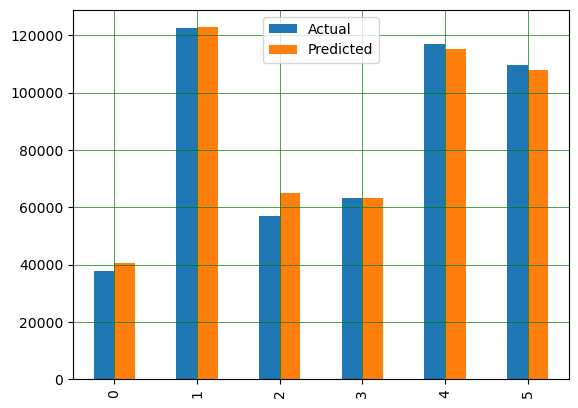

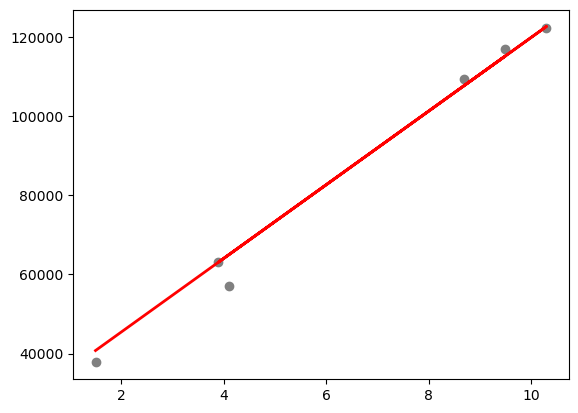

In [21]:
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Заработная плата")
plt.xlabel("Опыт работы")
plt.ylabel("Зарплата")
plt.show()




X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Задание 1.2.1

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

print(X)
print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [24]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test).reshape(1, -1)
# сравним фактические значения с прогнозируемыми
data = pd.DataFrame({"Actual": y_test,
                   "Predicted":pd.Series(*y_pred),
                   "Difference": y_test - pd.Series(*y_pred)})
data

,Actual,Predicted,Difference
0,37731.0,40748.961841,-3017.961841
1,122391.0,122699.622956,-308.622956
2,57081.0,64961.657170,-7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145
5,109431.0,107799.502753,1631.497247


In [29]:
print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


### Задание 1.3.2

#### часть 1

In [31]:
import seaborn as seabornInstance

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [33]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regressor = LinearRegression().fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-32.003954
Average_income,-0.075188
Paved_Highways,-0.002137
Population_Driver_licence(%),1355.827606


In [35]:
y_pred = regressor.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
33,628,621.250921
23,547,463.618291
38,648,727.431022
36,640,646.094665
2,561,585.209891
3,414,486.869741
31,554,587.673738
26,577,597.031210
44,782,702.923921
27,631,617.312283


In [36]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 2721.615957193215


#### часть 2

In [37]:
#Качество красного вина
dataset = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Задание* (3)

In [42]:
x = np.array([3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
y = np.array([2.0, 3.0, 3.0, 3.0, 2.0, 4.0])

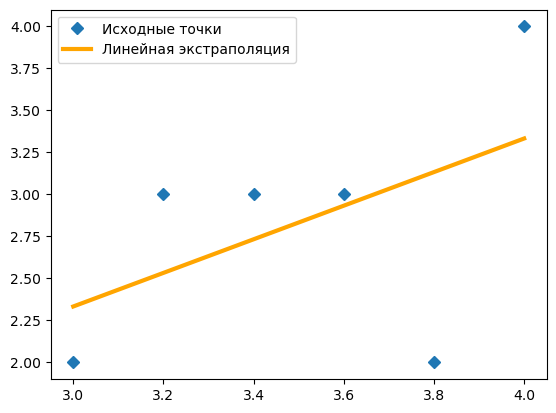

Коэф-ы полинома:  1.0 -0.667
Исходные y: 2.0 3.0 3.0 3.0 2.0 4.0
Полученные y:  2.333 2.533 2.733 2.933 3.133 3.333
MSE:  0.35555555555555546


In [43]:
# Полином первой степени

# y = kx + b = sA, где A = [[x, 1]], s = [k, b]
A = np.vstack([x, np.ones(len(x))]).T
s = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, "D", label='Исходные точки')
plt.plot(x, s[0] * x + s[1], 'orange',lw=3, label='Линейная экстраполяция')
plt.legend()
plt.show()


print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x + s[1]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x + s[1]))

Коэф-ы полинома:  0.446 -2.125 4.75
Исходные y: 2.0 3.0 3.0 3.0 2.0 4.0
Полученные y:  2.393 2.521 2.686 2.886 3.121 3.393
MSE:  0.35357142857142826


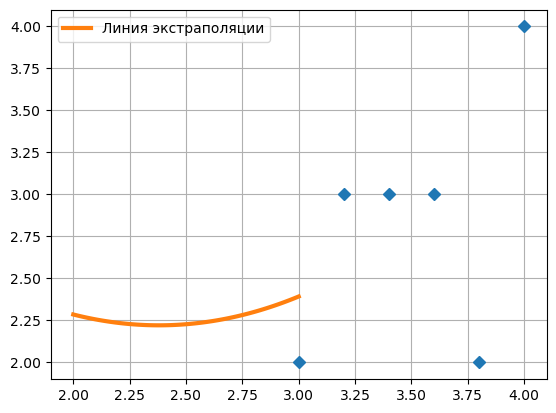

In [45]:
# Полином второй степени

# y = a_2 * x^2 + a_1 * x + a_0 = sA, где A = [[x^2, x, 1]], s = [a, b, c]
A = np.vstack([x**2, x, np.ones(len(x))]).T
s = np.linalg.lstsq(A, y, rcond=None)[0]

# на отрезке [2, 3]
x_prec = linspace(2, 3, 101)

# рисуем точки
plt.plot(x, y, "D")

#рисуем кривую вида y = a_1 * x^2 + a_2 * x + a_3, подставляя из решения коэф-ы s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], "-", lw=3, label='Линия экстраполяции')
plt.legend()
plt.grid()


print("Коэф-ы полинома: ", *s.round(3))
print("Исходные y:", *y)
print("Полученные y: ", *(s[0] * x**2 + s[1] * x + s[2]).round(3))
print("MSE: ", mean_squared_error(y, s[0] * x**2 + s[1] * x + s[2]))